# Identification d'arbres à partir de l'écorce
## réseau convolutif et apprentissage par transfert

##### Copyright 2019 The TensorFlow Authors.

In [85]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


--2020-08-06 01:42:40--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.5.112, 172.217.6.48, 216.58.195.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.5.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  1.19MB/s    in 1m 43s  

2020-08-06 01:44:24 (833 KB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [103]:
import os

import keras
print("Keras version:",keras.__version__)
import tensorflow as tf
print("TensorFlow version:",tf.__version__)


from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()


Keras version: 2.3.1
TensorFlow version: 2.2.0
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_564 (Conv2D)             (None, 74, 74, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_564 (BatchN (None, 74, 74, 32)   96          conv2d_564[0][0]                 
__________________________________________________________________________________________________
activation_564 (Activation)     (None, 74, 74, 32)   0           batch_normalization_564[0][0]    
________________________________________

In [104]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output


last layer output shape:  (None, 7, 7, 768)


## Transfer learning with pretrained Inception model - no data augmentation, no dropout



In [105]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
x = layers.Dense(3, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


In [106]:
# !wget --no-check-certificate \
#         https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#        -O /tmp/cats_and_dogs_filtered.zip

In [108]:

# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
try:
    os.mkdir('/tmp/lab_id_arbres/')
    os.mkdir('/tmp/lab_id_arbres/training/')
    os.mkdir('/tmp/lab_id_arbres/training/CHR/')
    os.mkdir('/tmp/lab_id_arbres/training/EPB/')
    os.mkdir('/tmp/lab_id_arbres/training/EPN/')
    os.mkdir('/tmp/lab_id_arbres/testing/')
    os.mkdir('/tmp/lab_id_arbres/testing/CHR/')
    os.mkdir('/tmp/lab_id_arbres/testing/EPB/')
    os.mkdir('/tmp/lab_id_arbres/testing/EPN/')
except OSError:
    pass


In [111]:
DATA_DIR = "/Users/claudecoulombe/Documents/PERSONNEL/LINGUA_CLOM-Expert/Projet_VIARENA/Lab-identification_arbres/ecorces_data/"
CHR_DIR = os.path.join(DATA_DIR,'CHR/')
EPB_DIR = os.path.join(DATA_DIR,'EPB/')
EPN_DIR = os.path.join(DATA_DIR,'EPN/')

print('total CHR images:', len(os.listdir(CHR_DIR)))
print('total EPB images:', len(os.listdir(EPB_DIR)))
print('total EPN images:', len(os.listdir(EPN_DIR)))

CHR_files = os.listdir(CHR_dir)
print(CHR_files[:10])

EPB_files = os.listdir(EPB_DIR)
print(EPB_files[:10])

EPN_files = os.listdir(EPN_DIR)
print(EPN_files[:10])

total CHR images: 2724
total EPB images: 596
total EPN images: 885
['518_CHR_97_GalaxyS7_20170916_181256_16.jpg', '503_CHR_39_GalaxyS7_20170916_161806_14.jpg', '478_CHR_132_GalaxyS7_20170916_142627_19.jpg', '52_CHR_82_Nexus 5_20170906_092540_2.jpg', '680_CHR_147_GalaxyS5_20170713_105943_9.jpg', '481_CHR_137_GalaxyS7_20170916_143231_8.jpg', '80_CHR_62_Nexus 5_20170906_105412_16.jpg', '484_CHR_201_GalaxyS7_20170916_150524_20.jpg', '477_CHR_152_GalaxyS7_20170916_142426_14.jpg', '495_CHR_74_GalaxyS7_20170916_154951_21.jpg']
['110_EPB_97_Nexus 5_20170817_113612_8.jpg', '687_EPB_50_GalaxyS5_20170712_122637_3.jpg', '686_EPB_47_GalaxyS5_20170712_122536_15.jpg', '683_EPB_46_GalaxyS5_20170712_122303_10.jpg', '689_EPB_67_GalaxyS5_20170712_122809_12.jpg', '88_EPB_73_Nexus 5_20170817_110805_25.jpg', '85_EPB_104_Nexus 5_20170817_110447_5.jpg', '88_EPB_73_Nexus 5_20170817_110805_19.jpg', '94_EPB_95_Nexus 5_20170817_111521_5.jpg', '89_EPB_71_Nexus 5_20170817_111001_8.jpg']
['729_EPN_68_GalaxyS5_201706

In [112]:
TRAINING_DIR = "/tmp/lab_id_arbres/training/"
TESTING_DIR = "/tmp/lab_id_arbres/testing/"

TRAINING_CHR_DIR = "/tmp/lab_id_arbres/training/CHR/"
TESTING_CHR_DIR = "/tmp/lab_id_arbres/testing/CHR/"

TRAINING_EPB_DIR = "/tmp/lab_id_arbres/training/EPB/"
TESTING_EPB_DIR = "/tmp/lab_id_arbres/testing/EPB/"

TRAINING_EPN_DIR = "/tmp/lab_id_arbres/training/EPN/"
TESTING_EPN_DIR = "/tmp/lab_id_arbres/testing/EPN/"


In [113]:
CHR_DIR

'/Users/claudecoulombe/Documents/PERSONNEL/LINGUA_CLOM-Expert/Projet_VIARENA/Lab-identification_arbres/ecorces_data/CHR/'

In [114]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copied to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list

import random
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_source_file_names = set(os.listdir(SOURCE))
    print("all_source_file_names[:3]:",list(all_source_file_names)[:3])
    n_source_files = len(all_source_file_names)
    print("n_source_files:",n_source_files)
    n_training_files = int(n_source_files*SPLIT_SIZE)
    print("n_training_files:",n_training_files)
    random_training_file_names = set(random.sample(list(all_source_file_names), n_training_files))
    print("random_training_file_names[:3]:",list(random_training_file_names)[:3])
    testing_files_names = all_source_file_names - random_training_file_names
    print("testing_files_names[:3]:",list(testing_files_names)[:3])
    for training_file_name in random_training_file_names:
        if (os.path.isfile(SOURCE+training_file_name)) and (os.path.getsize(SOURCE+training_file_name) > 0):
            copyfile(SOURCE+training_file_name, TRAINING+training_file_name)
    for testing_file_name in testing_files_names:
        if (os.path.isfile(SOURCE+testing_file_name)) and (os.path.getsize(SOURCE+testing_file_name) > 0):
            copyfile(SOURCE+testing_file_name, TESTING+testing_file_name)


split_size = 0.8
split_data(CHR_DIR, TRAINING_CHR_DIR, TESTING_CHR_DIR, split_size)
split_data(EPB_DIR, TRAINING_EPB_DIR, TESTING_EPB_DIR, split_size)
split_data(EPN_DIR, TRAINING_EPN_DIR, TESTING_EPN_DIR, split_size)

print("Data splitting done!")

all_source_file_names[:3]: ['483_CHR_69_GalaxyS7_20170916_145136_34.jpg', '489_CHR_94_GalaxyS7_20170916_153023_2.jpg', '486_CHR_147_GalaxyS7_20170916_151807_28.jpg']
n_source_files: 2724
n_training_files: 2179
random_training_file_names[:3]: ['483_CHR_69_GalaxyS7_20170916_145136_34.jpg', '489_CHR_94_GalaxyS7_20170916_153023_2.jpg', '487_CHR_61_GalaxyS7_20170916_152534_5.jpg']
testing_files_names[:3]: ['490_CHR_111_GalaxyS7_20170916_153259_26.jpg', '41_CHR_83_GalaxyS7_20170607_134909_44.jpg', '486_CHR_147_GalaxyS7_20170916_151807_28.jpg']
all_source_file_names[:3]: ['692_EPB_75_GalaxyS5_20170712_123338_2.jpg', '88_EPB_73_Nexus 5_20170817_110805_23.jpg', '90_EPB_73_Nexus 5_20170817_111119_16.jpg']
n_source_files: 596
n_training_files: 476
random_training_file_names[:3]: ['692_EPB_75_GalaxyS5_20170712_123338_2.jpg', '88_EPB_73_Nexus 5_20170817_110805_23.jpg', '94_EPB_95_Nexus 5_20170817_111521_3.jpg']
testing_files_names[:3]: ['92_EPB_72_Nexus 5_20170817_111310_13.jpg', '688_EPB_68_Galaxy

In [115]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  #  rotation_range = 40,
                                  #  width_shift_range = 0.2,
                                  #  height_shift_range = 0.2,
                                  #  shear_range = 0.2,
                                  #  zoom_range = 0.2,
                                  #  horizontal_flip = True)
)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  # rotation_range = 40,
                                  # width_shift_range = 0.2,
                                  # height_shift_range = 0.2,
                                  # shear_range = 0.2,
                                  # zoom_range = 0.2,
                                  # horizontal_flip = True)
)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(TESTING_DIR,
                                                          batch_size  = 20,
                                                          class_mode  = 'categorical', 
                                                          target_size = (150, 150))
print("Data amplification done!")

Found 3363 images belonging to 3 classes.
Found 842 images belonging to 3 classes.
Data amplification done!


In [116]:
validation_steps=20
loss0,accuracy0 = model.evaluate(validation_generator, steps = validation_steps)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

20/20 [==============================] - 51s 3s/step - loss: 1.5226 - accuracy: 0.1325
initial loss: 1.52
initial accuracy: 0.13


In [117]:
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 10,
            epochs = 20,
            validation_steps = 3,
            verbose = 2)

Epoch 1/20
10/10 - 46s - loss: 3.6647 - accuracy: 0.4750 - val_loss: 0.4802 - val_accuracy: 0.8333
Epoch 2/20
10/10 - 44s - loss: 0.5724 - accuracy: 0.7550 - val_loss: 0.4803 - val_accuracy: 0.8500
Epoch 3/20
10/10 - 43s - loss: 0.4881 - accuracy: 0.7800 - val_loss: 0.8746 - val_accuracy: 0.6333
Epoch 4/20
10/10 - 45s - loss: 0.6115 - accuracy: 0.7950 - val_loss: 0.4339 - val_accuracy: 0.8000
Epoch 5/20
10/10 - 40s - loss: 0.4109 - accuracy: 0.8250 - val_loss: 0.2564 - val_accuracy: 0.9000
Epoch 6/20
10/10 - 43s - loss: 0.4896 - accuracy: 0.8250 - val_loss: 0.2539 - val_accuracy: 0.8833
Epoch 7/20
10/10 - 58s - loss: 0.4039 - accuracy: 0.8400 - val_loss: 0.1611 - val_accuracy: 0.9333
Epoch 8/20
10/10 - 49s - loss: 0.2598 - accuracy: 0.8900 - val_loss: 0.2445 - val_accuracy: 0.9500
Epoch 9/20
10/10 - 49s - loss: 0.5239 - accuracy: 0.8000 - val_loss: 0.2450 - val_accuracy: 0.8833
Epoch 10/20
10/10 - 43s - loss: 0.3751 - accuracy: 0.8500 - val_loss: 0.1764 - val_accuracy: 0.9167
Epoch 11/

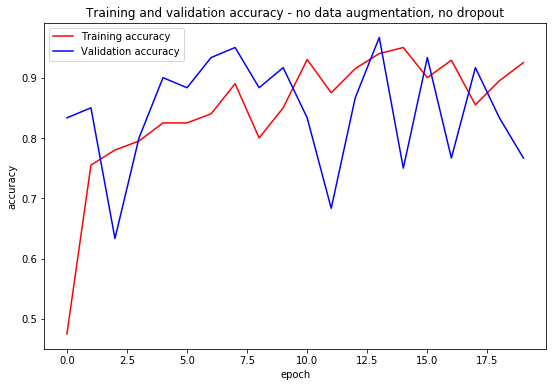

In [118]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
golden_number = 1.618
height = 6
length = int(golden_number * height)
plt.figure(figsize=(length,height))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - no data augmentation, no dropout')
plt.legend(loc=0)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

## Performing data augmentation on training dataset only and no dropout

In [120]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
x = layers.Dense(3, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


In [121]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
#)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( TESTING_DIR,
                                                          batch_size  = 20,
                                                          class_mode  = 'categorical', 
                                                          target_size = (150, 150))


Found 3363 images belonging to 3 classes.
Found 842 images belonging to 3 classes.


In [122]:
validation_steps=20
loss0,accuracy0 = model.evaluate(validation_generator, steps = validation_steps)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


20/20 [==============================] - 56s 3s/step - loss: 0.9351 - accuracy: 0.6400
initial loss: 0.94
initial accuracy: 0.64


In [123]:
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 10,
            verbose = 2)


Epoch 1/20
100/100 - 376s - loss: 0.6305 - accuracy: 0.7665 - val_loss: 0.3610 - val_accuracy: 0.8650
Epoch 2/20
100/100 - 340s - loss: 0.3565 - accuracy: 0.8665 - val_loss: 0.1763 - val_accuracy: 0.9200
Epoch 3/20
100/100 - 335s - loss: 0.2701 - accuracy: 0.8995 - val_loss: 0.8107 - val_accuracy: 0.7600
Epoch 4/20
100/100 - 329s - loss: 0.2510 - accuracy: 0.9133 - val_loss: 0.2841 - val_accuracy: 0.9250
Epoch 5/20
100/100 - 328s - loss: 0.2078 - accuracy: 0.9314 - val_loss: 0.4616 - val_accuracy: 0.8750
Epoch 6/20
100/100 - 332s - loss: 0.2164 - accuracy: 0.9228 - val_loss: 0.5198 - val_accuracy: 0.8750
Epoch 7/20
100/100 - 332s - loss: 0.2027 - accuracy: 0.9355 - val_loss: 0.1827 - val_accuracy: 0.9300
Epoch 8/20
100/100 - 327s - loss: 0.1829 - accuracy: 0.9355 - val_loss: 0.1489 - val_accuracy: 0.9450
Epoch 9/20
100/100 - 328s - loss: 0.1564 - accuracy: 0.9465 - val_loss: 0.2285 - val_accuracy: 0.9300
Epoch 10/20
100/100 - 331s - loss: 0.1877 - accuracy: 0.9334 - val_loss: 0.1743 - 

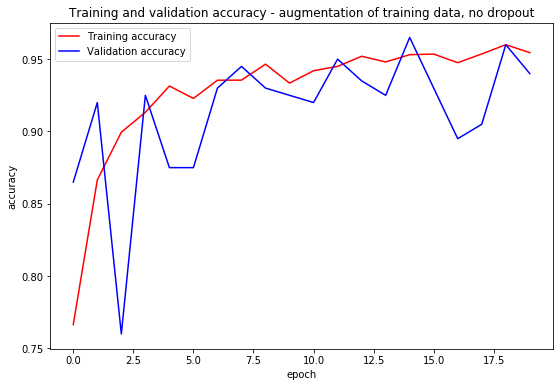

In [124]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
golden_number = 1.618
height = 6
length = int(golden_number * height)
plt.figure(figsize=(length,height))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - augmentation of training data, no dropout')
plt.legend(loc=0)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()


## Performing data augmentation on training and evaluation dataset, no dropout

In [125]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
x = layers.Dense(3, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


In [126]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(TESTING_DIR,
                                                         batch_size  = 20,
                                                         class_mode  = 'categorical', 
                                                         target_size = (150, 150))


Found 3363 images belonging to 3 classes.
Found 842 images belonging to 3 classes.


In [127]:
validation_steps=20
loss0,accuracy0 = model.evaluate(validation_generator, steps = validation_steps)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


20/20 [==============================] - 55s 3s/step - loss: 1.1561 - accuracy: 0.2750
initial loss: 1.16
initial accuracy: 0.28


In [128]:
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)


Epoch 1/20
100/100 - 424s - loss: 0.6355 - accuracy: 0.7770 - val_loss: 0.3131 - val_accuracy: 0.8872
Epoch 2/20
100/100 - 416s - loss: 0.3664 - accuracy: 0.8739 - val_loss: 0.3001 - val_accuracy: 0.8729
Epoch 3/20
100/100 - 420s - loss: 0.2635 - accuracy: 0.8961 - val_loss: 0.2538 - val_accuracy: 0.9133
Epoch 4/20
100/100 - 418s - loss: 0.2626 - accuracy: 0.9047 - val_loss: 0.1511 - val_accuracy: 0.9477
Epoch 5/20
100/100 - 419s - loss: 0.2174 - accuracy: 0.9223 - val_loss: 0.1621 - val_accuracy: 0.9418
Epoch 6/20
100/100 - 416s - loss: 0.2361 - accuracy: 0.9143 - val_loss: 0.2412 - val_accuracy: 0.9145
Epoch 7/20
100/100 - 417s - loss: 0.1868 - accuracy: 0.9355 - val_loss: 0.2809 - val_accuracy: 0.9074
Epoch 8/20
100/100 - 422s - loss: 0.1849 - accuracy: 0.9410 - val_loss: 0.1720 - val_accuracy: 0.9371
Epoch 9/20
100/100 - 418s - loss: 0.1747 - accuracy: 0.9380 - val_loss: 0.1438 - val_accuracy: 0.9501
Epoch 10/20
100/100 - 420s - loss: 0.1723 - accuracy: 0.9370 - val_loss: 0.2087 - 

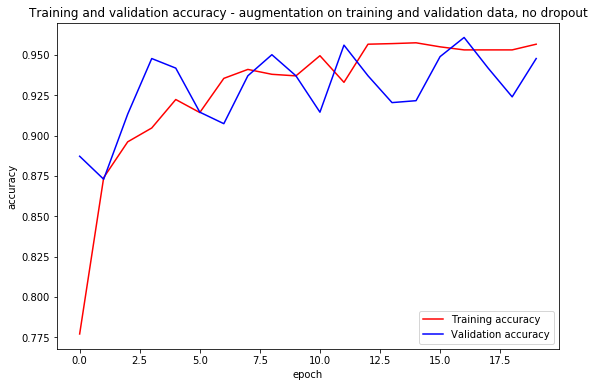

In [129]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
golden_number = 1.618
height = 6
length = int(golden_number * height)
plt.figure(figsize=(length,height))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - augmentation on training and validation data, no dropout')
plt.legend(loc=0)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()


## Performing data augmentation on training dataset, with dropout

In [130]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
x = layers.Dense(3, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


In [131]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 20,
                                                    class_mode = 'categorical', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(TESTING_DIR,
                                                         batch_size  = 20,
                                                         class_mode  = 'categorical', 
                                                         target_size = (150, 150))


Found 3363 images belonging to 3 classes.
Found 842 images belonging to 3 classes.


In [132]:
validation_steps=20
loss0,accuracy0 = model.evaluate(validation_generator, steps = validation_steps)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))


20/20 [==============================] - 52s 3s/step - loss: 1.0338 - accuracy: 0.5150
initial loss: 1.03
initial accuracy: 0.51


In [133]:
history = model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)


Epoch 1/20
100/100 - 410s - loss: 0.7257 - accuracy: 0.7595 - val_loss: 0.2971 - val_accuracy: 0.8705
Epoch 2/20
100/100 - 419s - loss: 0.3997 - accuracy: 0.8485 - val_loss: 0.2514 - val_accuracy: 0.8943
Epoch 3/20
100/100 - 415s - loss: 0.2769 - accuracy: 0.8916 - val_loss: 0.3878 - val_accuracy: 0.8563
Epoch 4/20
100/100 - 414s - loss: 0.2335 - accuracy: 0.9143 - val_loss: 0.1956 - val_accuracy: 0.9359
Epoch 5/20
100/100 - 421s - loss: 0.2326 - accuracy: 0.9170 - val_loss: 0.4391 - val_accuracy: 0.8646
Epoch 6/20
100/100 - 425s - loss: 0.2336 - accuracy: 0.9120 - val_loss: 0.1591 - val_accuracy: 0.9371
Epoch 7/20
100/100 - 422s - loss: 0.2065 - accuracy: 0.9270 - val_loss: 1.3673 - val_accuracy: 0.7352
Epoch 8/20
100/100 - 419s - loss: 0.2102 - accuracy: 0.9330 - val_loss: 1.3378 - val_accuracy: 0.7874
Epoch 9/20
100/100 - 418s - loss: 0.2106 - accuracy: 0.9315 - val_loss: 0.1723 - val_accuracy: 0.9371
Epoch 10/20
100/100 - 420s - loss: 0.1672 - accuracy: 0.9415 - val_loss: 0.2974 - 

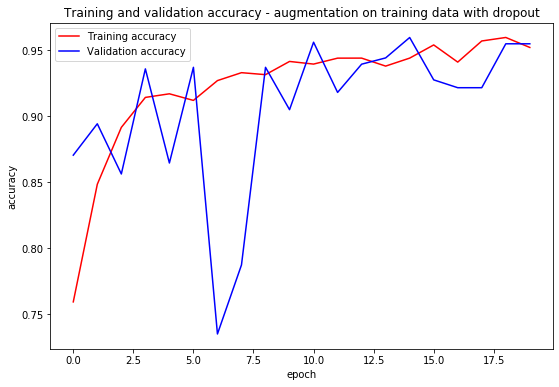

In [134]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
golden_number = 1.618
height = 6
length = int(golden_number * height)
plt.figure(figsize=(length,height))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy - augmentation on training data with dropout')
plt.legend(loc=0)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()


In [135]:
print("IPython Notebook executed")


IPython Notebook executed
